# The Emo_support Dataset v1

In [1]:
import pandas as pd
import numpy as np
path = r'C:/Users/bruno_k6bfbrq/Documents/3_Tesis/conjuntos/'

In [2]:
def process_data(pathset,type,name,numberofchunks):
    dataframes = []
    for i in range(1,numberofchunks+1):
        file = pathset+type+str(i)+'_'+name+'.xlsx'
        dataframes.append(pd.read_excel(pathset+type+str(i)+'_'+name+'.xlsx'))
        print(f"el archivo {file} se ha cargado correctamente")
    return dataframes


In [3]:
dataframes=process_data((path+'TSATCC/TSATC_sp/'),'train','TSATCC',12)

el archivo C:/Users/bruno_k6bfbrq/Documents/3_Tesis/conjuntos/TSATCC/TSATC_sp/train1_TSATCC.xlsx se ha cargado correctamente
el archivo C:/Users/bruno_k6bfbrq/Documents/3_Tesis/conjuntos/TSATCC/TSATC_sp/train2_TSATCC.xlsx se ha cargado correctamente
el archivo C:/Users/bruno_k6bfbrq/Documents/3_Tesis/conjuntos/TSATCC/TSATC_sp/train3_TSATCC.xlsx se ha cargado correctamente
el archivo C:/Users/bruno_k6bfbrq/Documents/3_Tesis/conjuntos/TSATCC/TSATC_sp/train4_TSATCC.xlsx se ha cargado correctamente
el archivo C:/Users/bruno_k6bfbrq/Documents/3_Tesis/conjuntos/TSATCC/TSATC_sp/train5_TSATCC.xlsx se ha cargado correctamente
el archivo C:/Users/bruno_k6bfbrq/Documents/3_Tesis/conjuntos/TSATCC/TSATC_sp/train6_TSATCC.xlsx se ha cargado correctamente
el archivo C:/Users/bruno_k6bfbrq/Documents/3_Tesis/conjuntos/TSATCC/TSATC_sp/train7_TSATCC.xlsx se ha cargado correctamente
el archivo C:/Users/bruno_k6bfbrq/Documents/3_Tesis/conjuntos/TSATCC/TSATC_sp/train8_TSATCC.xlsx se ha cargado correctamente


In [4]:
len(dataframes)

12

In [5]:
for i in range(0,len(dataframes)):
    print(dataframes[i])

       etiqueta                                                Pío
0             0   @USUARIO Mi pobre y pequeña bola de masa En l...
1             0   Me voy demasiado a la cama. Tengo que levanta...
2             0   Todavía no he podido escucharlo. Mis parlante...
3             0   ahora recuerda por qué resolver una ecuación ...
4             0                      Comí demasiado, me siento mal
...         ...                                                ...
93329         1   ¡Deseando que llegue el fin de semana! Celebr...
93330         1   está bebiendo un buen sprite frío, está tan f...
93331         1                     @USER na dann mal guten Hambre
93332         0   Acabo de pasar las últimas 3,5 horas observan...
93333         0                          @USUARIO ¡Quiero leer! <3

[93334 rows x 2 columns]
       etiqueta                                                Pío
0             1   @USER @USER @USER ¡Me alegro de que hayan ven...
1             0                     

In [6]:
train_TSATCC = pd.concat(dataframes)
train_TSATCC = train_TSATCC.drop_duplicates()
train_TSATCC = train_TSATCC.reset_index(drop=True)
#renombrar columna ' Pío' por 'texto'
train_TSATCC = train_TSATCC.rename(columns={' Pío':'texto'})


In [7]:
train_TSATCC

,etiqueta,texto
0,0,@USUARIO Mi pobre y pequeña bola de masa En l...
1,0,Me voy demasiado a la cama. Tengo que levanta...
2,0,Todavía no he podido escucharlo. Mis parlante...
3,0,ahora recuerda por qué resolver una ecuación ...
4,0,"Comí demasiado, me siento mal"
...,...,...
1082816,0,Hoy vi a mucha gente que extrañé... Quiero vo...
1082817,1,- Me gusta
1082818,1,arando a través de las asignaciones pero mira...
1082819,1,@USUARIO No veo la hora de ver a Joseph en su...


In [8]:
print(f"train_TSATCC:\n {train_TSATCC['etiqueta'].value_counts()}")

train_TSATCC:
 etiqueta
0    543894
1    538927
Name: count, dtype: int64


In [9]:
train_TSATCC['etiqueta'] = train_TSATCC['etiqueta'].replace([1,0],['Sentimiento: Positivo','Sentimiento: Negativo'])

In [10]:
print(f"train_TSATCC:\n {train_TSATCC['etiqueta'].value_counts()}\n")

train_TSATCC:
 etiqueta
Sentimiento: Negativo    543894
Sentimiento: Positivo    538927
Name: count, dtype: int64



In [11]:
# now let's add a 'Consulta:' at the begining of each value in the 'texto' column and '\n'at the end of each value in the 'texto' column
train_TSATCC['texto'] = 'Consulta: <' + train_TSATCC['texto'].astype(str) + '>\n'

In [12]:
train_TSATCC

,etiqueta,texto
0,Sentimiento: Negativo,Consulta: < @USUARIO Mi pobre y pequeña bola d...
1,Sentimiento: Negativo,Consulta: < Me voy demasiado a la cama. Tengo ...
2,Sentimiento: Negativo,Consulta: < Todavía no he podido escucharlo. M...
3,Sentimiento: Negativo,Consulta: < ahora recuerda por qué resolver un...
4,Sentimiento: Negativo,"Consulta: < Comí demasiado, me siento mal>\n"
...,...,...
1082816,Sentimiento: Negativo,Consulta: < Hoy vi a mucha gente que extrañé.....
1082817,Sentimiento: Positivo,Consulta: < - Me gusta>\n
1082818,Sentimiento: Positivo,Consulta: < arando a través de las asignacione...
1082819,Sentimiento: Positivo,Consulta: < @USUARIO No veo la hora de ver a J...


In [13]:
#now for the 6 chunks of the test set
Test_dataframes=process_data((path+'TSATCC/TSATC_sp/'),'test','TSATCC',6)

el archivo C:/Users/bruno_k6bfbrq/Documents/3_Tesis/conjuntos/TSATCC/TSATC_sp/test1_TSATCC.xlsx se ha cargado correctamente
el archivo C:/Users/bruno_k6bfbrq/Documents/3_Tesis/conjuntos/TSATCC/TSATC_sp/test2_TSATCC.xlsx se ha cargado correctamente
el archivo C:/Users/bruno_k6bfbrq/Documents/3_Tesis/conjuntos/TSATCC/TSATC_sp/test3_TSATCC.xlsx se ha cargado correctamente
el archivo C:/Users/bruno_k6bfbrq/Documents/3_Tesis/conjuntos/TSATCC/TSATC_sp/test4_TSATCC.xlsx se ha cargado correctamente
el archivo C:/Users/bruno_k6bfbrq/Documents/3_Tesis/conjuntos/TSATCC/TSATC_sp/test5_TSATCC.xlsx se ha cargado correctamente
el archivo C:/Users/bruno_k6bfbrq/Documents/3_Tesis/conjuntos/TSATCC/TSATC_sp/test6_TSATCC.xlsx se ha cargado correctamente


In [14]:
Test_TSACC = pd.concat(Test_dataframes)
Test_TSACC = Test_TSACC.drop_duplicates()
Test_TSACC = Test_TSACC.reset_index(drop=True)
#renombrar columna ' Pío' por 'texto'
Test_TSACC = Test_TSACC.rename(columns={' Pío':'texto'})
Test_TSACC


,etiqueta,texto
0,0,@USER no todo el equipo
1,0,@USER que me muera ?
2,0,a punto de declarar impuestos
3,0,@USUARIO Te hice un pastel pero me lo comí
4,0,esta semana no va como esperaba
...,...,...
334636,1,oooo jaja recién despierto y listo para comer ...
334637,1,#Traveltuesday @USER Porque sus tweets son di...
334638,1,@USUARIO Simplemente TENÍAS que decir eso. Di...
334639,1,"@USUARIO ahaha nooo, ¡estabas lejos de todos ..."


In [15]:
# now let's add a 'Consulta:' at the begining of each value in the 'texto' column and '\n'at the end of each value in the 'texto' column
Test_TSACC['texto'] = 'Consulta: <' + Test_TSACC['texto'].astype(str) + '>\n'

In [16]:
#let's replace the values in the 'etiqueta' column
Test_TSACC['etiqueta'] = Test_TSACC['etiqueta'].replace([1,0],['Sentimiento: Positivo','Sentimiento: Negativo'])
#let's shuffle the rows
Test_TSACC = Test_TSACC.sample(frac=1).reset_index(drop=True)
Test_TSACC

,etiqueta,texto
0,Sentimiento: Negativo,Consulta: < @USUARIO jaja. jajaja estoy MUY ce...
1,Sentimiento: Negativo,Consulta: < Así que actualmente 2 personas dij...
2,Sentimiento: Positivo,Consulta: < @USUARIO improvisando>\n
3,Sentimiento: Negativo,Consulta: < todavía está trabajando>\n
4,Sentimiento: Positivo,Consulta: < @USUARIO y @USUARIO um los auricul...
...,...,...
334636,Sentimiento: Positivo,"Consulta: < @USUARIO bueno, si tienes chocolat..."
334637,Sentimiento: Positivo,Consulta: < @ firecracker2007 Eres el mejor>\n
334638,Sentimiento: Negativo,Consulta: < Necesito crear un nuevo fondo. Ten...
334639,Sentimiento: Positivo,"Consulta: <Bueno, independientemente de si me ..."


In [17]:
#now for the 3 chunks of the validation set
Val_dataframes=process_data((path+'TSATCC/TSATC_sp/'),'validation','TSATCC',3)

el archivo C:/Users/bruno_k6bfbrq/Documents/3_Tesis/conjuntos/TSATCC/TSATC_sp/validation1_TSATCC.xlsx se ha cargado correctamente
el archivo C:/Users/bruno_k6bfbrq/Documents/3_Tesis/conjuntos/TSATCC/TSATC_sp/validation2_TSATCC.xlsx se ha cargado correctamente
el archivo C:/Users/bruno_k6bfbrq/Documents/3_Tesis/conjuntos/TSATCC/TSATC_sp/validation3_TSATCC.xlsx se ha cargado correctamente


In [18]:
Val_TSACC = pd.concat(Val_dataframes)
Val_TSACC = Val_TSACC.drop_duplicates()
Val_TSACC = Val_TSACC.reset_index(drop=True)
#renombrar columna ' Pío' por 'texto'
Val_TSACC = Val_TSACC.rename(columns={' Pío':'texto'})
# now let's add a 'Consulta:' at the begining of each value in the 'texto' column and '\n'at the end of each value in the 'texto' column
Val_TSACC['texto'] = 'Consulta: <' + Val_TSACC['texto'].astype(str) + '>\n'
#let's replace the values in the 'etiqueta' column
Val_TSACC['etiqueta'] = Val_TSACC['etiqueta'].replace([1,0],['Sentimiento: Positivo','Sentimiento: Negativo'])
Val_TSACC

,etiqueta,texto
0,Sentimiento: Positivo,"Consulta: < @USUARIO genial, lo estoy esperand..."
1,Sentimiento: Negativo,Consulta: < desearía poder darle un nombre hoy...
2,Sentimiento: Positivo,"Consulta: < Rofl, me encanta cómo hay actualiz..."
3,Sentimiento: Negativo,"Consulta: < @USUARIO - Lo siento, tu día termi..."
4,Sentimiento: Negativo,Consulta: < ¡Argh! TweetDeck se bloqueó 5 vece...
...,...,...
134708,Sentimiento: Positivo,Consulta: < Nos inclinamos a creer a aquellos ...
134709,Sentimiento: Positivo,Consulta: < Y mi navaja te va a amar>\n
134710,Sentimiento: Negativo,"Consulta: < @USUARIO Millonario con Bashy, Big..."
134711,Sentimiento: Positivo,Consulta: < @USUARIO ¡Qué bien! Lamento que no...


In [19]:
#now last, saving the dataframes as csv files
train_TSATCC.to_csv(path+'TSATCC/TSATCSP/train_TSATCC.csv')
Test_TSACC.to_csv(path+'TSATCC/TSATCSP/Test_TSACC.csv')
Val_TSACC.to_csv(path+'TSATCC/TSATCSP/Val_TSACC.csv')

# TweetEval: Emotion
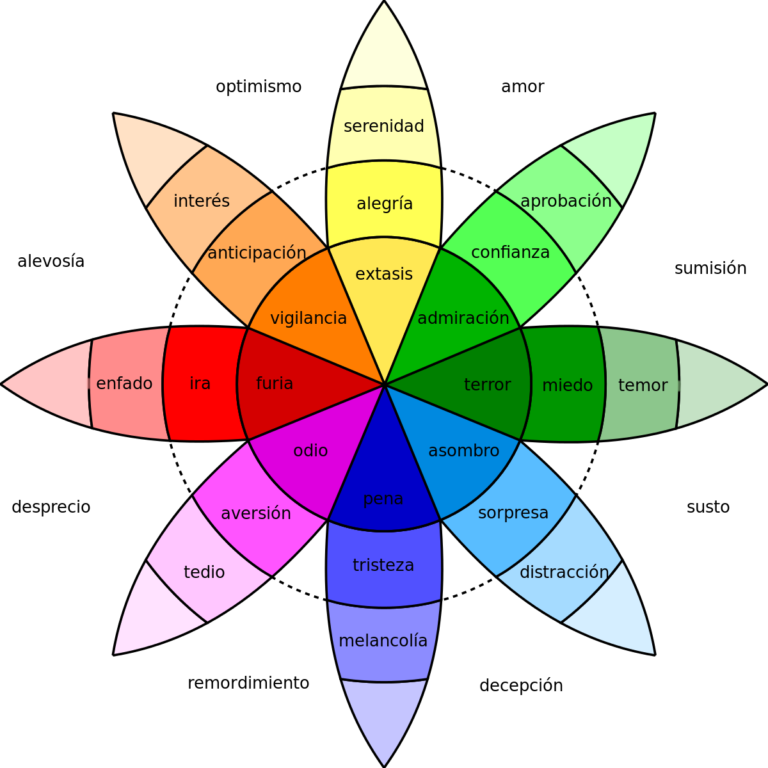
- 0 ira
- 1 alegría
- 2 optimismo
- 3 tristeza
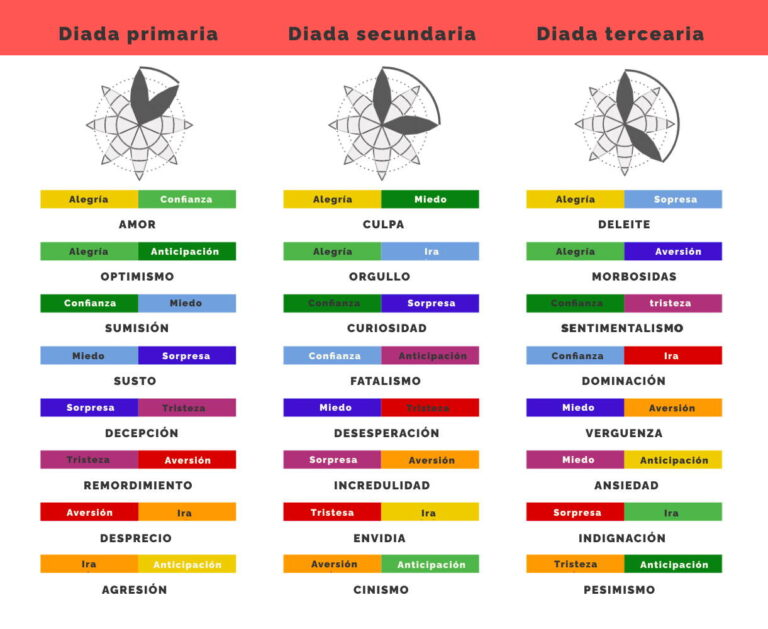

In [20]:
def TE_process_data(path, dataset_name, new_values, chunks =None):
    '''
    This function takes the path of the dataset, the name of the dataset, the chunks of the dataset, the destination path and the new values to replace the old ones
    and returns the processed dataframes as csv files
    path: path of the dataset
    dataset_name: name of the dataset
    destination_path: destination path
    new_values: new values to replace the old ones
    '''
    result ={}
    
    sets= ['Train','Test','Validation']
    for set in sets:
        if chunks is int:
            dataframes=process_data(path,dataset_name,chunks)
            df = pd.concat(dataframes)
            df = df.drop_duplicates()
            df = df.reset_index(drop=True)
        else:
            df= pd.read_excel((path+set+'_'+dataset_name+'.xlsx'))
        #replace the key ' etiqueta' with the key 'etiqueta'
        df = df.rename(columns={' etiqueta': 'etiqueta'})
        # now let's add a 'Consulta:' at the begining of each value in the 'texto' column and '\n'at the end of each value in the 'texto' column
        df['texto'] = 'Consulta: <' + df['texto'].astype(str) + '>\n'
        #replace 0 with ira, 1 with alegria, 2 with optimismo, 3 with tristeza, but with 'Emocion: emotion_name'
        df['etiqueta'] = df['etiqueta'].replace(new_values[0],new_values[1])
        #now last, saving the dataframes as csv files
        result[set] = df
    return result['Train'], result['Test'], result['Validation']
        

In [21]:
new_values = ([0,1,2,3],['Emocion: ira','Emocion: alegria','Emocion: optimismo','Emocion: tristeza'])
TE_Emotion_train, TE_Emotion_test, TE_Emotion_validation = TE_process_data((path+'TweetEval/TweetEval_traducir/TweetEval_sp/'),'emotion',new_values)
print(f"TE_Emotion_train:\n {TE_Emotion_train['etiqueta'].value_counts()}\n")

TE_Emotion_train:
 etiqueta
Emocion: ira          1400
Emocion: tristeza      855
Emocion: alegria       708
Emocion: optimismo     294
Name: count, dtype: int64



In [22]:
# TE_process_data for hate
nevalues = ([1],['Emocion: odio'])
TE_Hate_train, TE_Hate_test, TE_Hate_validation = TE_process_data((path+'TweetEval/TweetEval_traducir/TweetEval_sp/'),'hate',(path+'TweetEval/TweetEval_traducir/TE_SP/'),nevalues)

In [23]:
# let's drop the 0 values from the etiqueta column
TE_Hate_train = TE_Hate_train[TE_Hate_train['etiqueta'] != 0]
TE_Hate_test = TE_Hate_test[TE_Hate_test['etiqueta'] != 0]
TE_Hate_validation = TE_Hate_validation[TE_Hate_validation['etiqueta'] != 0]

In [24]:
TE_Hate_train['etiqueta'] = TE_Hate_train['etiqueta'].replace([1],['Emocion: odio'])
TE_Hate_test['etiqueta'] = TE_Hate_test['etiqueta'].replace([1],['Emocion: odio'])
TE_Hate_validation['etiqueta'] = TE_Hate_validation['etiqueta'].replace([1],['Emocion: odio'])
print(f"TE_Hate_train:\n {TE_Hate_train}\n TE_Hate_test:\n {TE_Hate_test}\n TE_Hate_validation:\n {TE_Hate_validation}\n")
#values in the etiqueta column
print(f"TE_Hate_train:\n {TE_Hate_train['etiqueta'].value_counts()}\n TE_Hate_test:\n {TE_Hate_test['etiqueta'].value_counts()}\n TE_Hate_validation:\n {TE_Hate_validation['etiqueta'].value_counts()}\n")

TE_Hate_train:
                                                   texto       etiqueta
1     Consulta: < Una mujer a la que follaste varias...  Emocion: odio
2     Consulta: < @usuario @usuario charla real ¿tie...  Emocion: odio
3     Consulta: < ¡Tu novia me mira como una groupie...  Emocion: odio
7     Consulta: < ¡NO VOY A PERSEGUIR A TU EX BF, MI...  Emocion: odio
9     Consulta: < Enviar a casa a los inmigrantes qu...  Emocion: odio
...                                                 ...            ...
8982  Consulta: <En serio. Saca a esta gente de ahí....  Emocion: odio
8983  Consulta: < QUIEN ES LA PUTA AHORA PEDAZO DE M...  Emocion: odio
8993  Consulta: < @usuario Llámalo como quieras: ala...  Emocion: odio
8997  Consulta: < Perra, no puedes seguir el ritmo, ...  Emocion: odio
8999  Consulta: < @usuario hola Lo mejor es que veo ...  Emocion: odio

[3783 rows x 2 columns]
 TE_Hate_test:
                                                   texto       etiqueta
1     Consulta: < Qu

In [25]:
#now TE_process_data for offensive
new_values = ([0,1],['Emocion: no_ofensivo','Emocion: ira'])
TE_Offensive_train, TE_Offensive_test, TE_Offensive_validation = TE_process_data((path+'TweetEval/TweetEval_traducir/TweetEval_sp/'),'offensive',(path+'TweetEval/TweetEval_traducir/TE_SP/'),new_values)
# let's drop the 0 values from the etiqueta column
TE_Offensive_train = TE_Offensive_train[TE_Offensive_train['etiqueta'] != 0]
TE_Offensive_test = TE_Offensive_test[TE_Offensive_test['etiqueta'] != 0]
TE_Offensive_validation = TE_Offensive_validation[TE_Offensive_validation['etiqueta'] != 0]
TE_Offensive_train['etiqueta'] = TE_Offensive_train['etiqueta'].replace([1],['Emocion: ira'])
TE_Offensive_test['etiqueta'] = TE_Offensive_test['etiqueta'].replace([1],['Emocion: ira'])
TE_Offensive_validation['etiqueta'] = TE_Offensive_validation['etiqueta'].replace([1],['Emocion: ira'])
TE_Offensive_train

,texto,etiqueta
1,Consulta: < @user Ocho años los republicanos n...,Emocion: ira
4,Consulta: < @user ¿Se ha convertido en una par...,Emocion: ira
6,Consulta: < @user Te pareces más a una planta ...,Emocion: ira
10,Consulta: < @user Antifa quemaría una casa de ...,Emocion: ira
11,Consulta: <@usuario Citan que Jones fue expuls...,Emocion: ira
...,...,...
11902,"Consulta: < @user ¡Maldita sea, ella es fea!>\n",Emocion: ira
11909,Consulta: < . @user TODO LO QUE TENGO QUE DECI...,Emocion: ira
11910,Consulta: < @usuario... preguntándose qué mier...,Emocion: ira
11911,Consulta: < @usuario Me pregunto si son víctim...,Emocion: ira


# DailyDialog

In [28]:
#now let's get the data from the DailyDialog dataset usiing the fallowing path 'C:\Users\bruno_k6bfbrq\Documents\3_Tesis\conjuntos\Dailydialog\DailyDialog_sp\Esp-Test_dailyDialog.xlsx'
TraindailyDialog = pd.read_csv('C:/Users/bruno_k6bfbrq/Documents/3_Tesis/conjuntos/Dailydialog/Train_dailyDialog.csv')
TestdailyDialog = pd.read_csv('C:/Users/bruno_k6bfbrq/Documents/3_Tesis/conjuntos/Dailydialog/Test_dailyDialog.csv')
ValidationdailyDialog = pd.read_csv('C:/Users/bruno_k6bfbrq/Documents/3_Tesis/conjuntos/Dailydialog/Validation_dailyDialog.csv')
Train_dailyDialog = TraindailyDialog
Test_dailyDialog = TestdailyDialog
Validation_dailyDialog = ValidationdailyDialog

In [29]:
def daily_proces (chunks):
    result = []
    for chunk in chunks:
        print(chunk)
        chunk = chunk.drop(columns=['act'])
        chunk['dialog'] = chunk['dialog'].str.replace('[',"")
        chunk['dialog'] = chunk['dialog'].str.replace(']',"")
        chunk['dialog'] = chunk['dialog'].str.replace(' "','"')
        chunk['dialog'] = chunk['dialog'].str.replace(" '","'")
        chunk['dialog'] = chunk['dialog'].str.replace("' ","'")
        chunk['dialog'] = chunk['dialog'].str.replace('" ','"')
        chunk['dialog'] = chunk['dialog'].str.replace('"',"'")
        for dialog in range(len(chunk['dialog'])):
            chunk['dialog'][dialog] = chunk['dialog'][dialog].split("',")
        chunk['dialog']=chunk['dialog'].apply(lambda x: [i.strip().replace("I'","I’") for i in x])
        chunk['dialog']=chunk['dialog'].apply(lambda x: [i.strip().replace("you'","you’") for i in x])
        chunk['dialog']=chunk['dialog'].apply(lambda x: [i.strip().replace("we'","we’") for i in x])
        chunk['dialog']=chunk['dialog'].apply(lambda x: [i.strip().replace("they'","they’") for i in x])
        chunk['dialog']=chunk['dialog'].apply(lambda x: [i.strip().replace("he'","he’") for i in x])
        chunk['dialog']=chunk['dialog'].apply(lambda x: [i.strip().replace("she'","she’") for i in x])
        chunk['dialog']=chunk['dialog'].apply(lambda x: [i.strip().replace("it'","it’") for i in x])
        chunk['dialog']=chunk['dialog'].apply(lambda x: [i.strip().replace("I '","I’") for i in x])
        chunk['dialog']=chunk['dialog'].apply(lambda x: [i.strip().replace("you '","you’") for i in x])
        chunk['dialog']=chunk['dialog'].apply(lambda x: [i.strip().replace("we '","we’") for i in x])
        chunk['dialog']=chunk['dialog'].apply(lambda x: [i.strip().replace("they '","they’") for i in x])
        chunk['dialog']=chunk['dialog'].apply(lambda x: [i.strip().replace("he '","he’") for i in x])
        chunk['dialog']=chunk['dialog'].apply(lambda x: [i.strip().replace("she '","she’") for i in x])
        chunk['dialog']=chunk['dialog'].apply(lambda x: [i.strip().replace("it '","it’") for i in x])
        chunk['dialog']=chunk['dialog'].apply(lambda x: [i.strip().replace("I ’","I’") for i in x])
        chunk['dialog']=chunk['dialog'].apply(lambda x: [i.strip().replace("you ’","you’") for i in x])
        chunk['dialog']=chunk['dialog'].apply(lambda x: [i.strip().replace("we ’","we’") for i in x])
        chunk['dialog']=chunk['dialog'].apply(lambda x: [i.strip().replace("they ’","they’") for i in x])
        chunk['dialog']=chunk['dialog'].apply(lambda x: [i.strip().replace("he ’","he’") for i in x])
        chunk['dialog']=chunk['dialog'].apply(lambda x: [i.strip().replace("she ’","she’") for i in x])
        chunk['dialog']=chunk['dialog'].apply(lambda x: [i.strip().replace("it ’","it’") for i in x])
        chunk['dialog']=chunk['dialog'].apply(lambda x: [i.strip().replace("'","") for i in x])
        #rename columns ' emoción' and 'diálogo' to 'emocion' and 'dialogo'
        chunk = chunk.rename(columns={'emotion':'emocion','dialog':'dialogo'})
        chunk['emocion'] = chunk['emocion'].str.replace('[','')
        chunk['emocion'] = chunk['emocion'].str.replace(']','')
        chunk['emocion'] = chunk['emocion'].str.replace("'",'')
        chunk['emocion'] = chunk['emocion'].str.replace('"','')
        chunk['emocion'] = chunk['emocion'].str.replace(' ','')
        chunk['emocion'] = chunk['emocion'].str.split(',')
        result.append(chunk)
    return result

In [30]:
Train_dailyDialog, Test_dailyDialog, Validation_dailyDialog = daily_proces([Train_dailyDialog, Test_dailyDialog, Validation_dailyDialog])

                                                  dialog  \
0      ['Say , Jim , how about going for a few beers ...   
1      ['Can you do push-ups ? ', " Of course I can ....   
2      ['Can you study with the radio on ? ', ' No , ...   
3      ['Are you all right ? ', ' I will be all right...   
4      ['Hey John , nice skates . Are they new ? ', '...   
...                                                  ...   
11113  ['Hello , I bought a pen in your shop just bef...   
11114  ['Do you have any seats available ? ', ' Yes ....   
11115  ['Uncle Ben , how did the Forbidden City get t...   
11116  ['May I help you , sir ? ', ' I want a pair of...   
11117  ['Could I have the check , please ? ', " Okay ...   

                                                    act  \
0                        [3, 4, 2, 2, 2, 3, 4, 1, 3, 4]   
1                                    [2, 1, 2, 2, 1, 1]   
2                                       [2, 1, 2, 1, 1]   
3                                          

In [31]:
print(Train_dailyDialog)
print(Test_dailyDialog)
print(Validation_dailyDialog)

                                                 dialogo  \
0      [Say , Jim , how about going for a few beers a...   
1      [Can you do push-ups ?, Of course I can . Its ...   
2      [Can you study with the radio on ?, No , I lis...   
3      [Are you all right ?, I will be all right soon...   
4      [Hey John , nice skates . Are they new ?, Yeah...   
...                                                  ...   
11113  [Hello , I bought a pen in your shop just befo...   
11114  [Do you have any seats available ?, Yes . This...   
11115  [Uncle Ben , how did the Forbidden City get th...   
11116  [May I help you , sir ?, I want a pair of locu...   
11117  [Could I have the check , please ?, Okay . I’l...   

                                                emocion  
0                        [0, 0, 0, 0, 0, 0, 4, 4, 4, 4]  
1                                    [0, 0, 6, 0, 0, 0]  
2                                       [0, 0, 0, 0, 0]  
3                                          [0, 

In [32]:
def daily_proces2 (chunks):
    #match the values of the 'emocion' column with the values of the 'dialogo' column
    new_values = []
    for chunk in chunks:
        dialogo = []
        emotion = []
        forfix = []
        for i in range(len(chunk['dialogo'])):
            if len(chunk['dialogo'][i]) == len(chunk['emocion'][i]):
                for j in range(len(chunk['dialogo'][i])):
                    dialogo.append(chunk['dialogo'][i][j])
                    emotion.append(chunk['emocion'][i][j])
            else:
                forfix.append(i)
        df = pd.DataFrame({'dialogo':dialogo,'emocion':emotion})
        print(df)
        new_values.append(df)
    return new_values

In [33]:
NTrain_dailyDialog, NTest_dailyDialog, NValidation_dailyDialog = daily_proces2([Train_dailyDialog, Test_dailyDialog, Validation_dailyDialog])

                                                 dialogo emocion
0      Say , Jim , how about going for a few beers af...       0
1      You know that is tempting but is really not go...       0
2          What do you mean ? It will help us to relax .       0
3      Do you really think so ? I dont . It will just...       0
4      I guess you are right.But what shall we do ? I...       0
...                                                  ...     ...
86947                           I want a pair of locus .       0
86948      Take a look at the ones on display , please .       0
86949                                   I need size 41 .       0
86950                  Could I have the check , please ?       0
86951                     Okay . I’ll just be a minute .       0

[86952 rows x 2 columns]
                                                dialogo emocion
0                   Hey man , you wanna buy some weed ?       0
1                                           Some what ?       6
2 

In [ ]:
print(NTrain_dailyDialog.value_counts('emocion'))
print(NTest_dailyDialog.value_counts('emocion'))
print(NValidation_dailyDialog.value_counts('emocion'))

emocion
0    71960
4    11161
6     1591
5      969
1      822
2      303
3      146
Name: count, dtype: int64
emocion
0    6321
4    1019
1     118
6     116
5     102
2      47
3      17
Name: count, dtype: int64
emocion
0    7091
4     683
6     106
5      79
1      77
3      11
2       3
Name: count, dtype: int64


In [34]:
#drop 0 values
NTrain_dailyDialog = NTrain_dailyDialog[NTrain_dailyDialog['emocion'] != '0']
NTest_dailyDialog = NTest_dailyDialog[NTest_dailyDialog['emocion'] != '0']
NValidation_dailyDialog = NValidation_dailyDialog[NValidation_dailyDialog['emocion'] != '0']
#save the new values in excel files
NTrain_dailyDialog.to_excel('Train_dailyDialog.xlsx')
NTest_dailyDialog.to_excel('Test_dailyDialog.xlsx')
NValidation_dailyDialog.to_excel('Validation_dailyDialog.xlsx')


In [35]:
#once is translated the dataset, we can use the following code to process the dataset
#read the excel files
Train_dailyDialog = pd.read_excel('Esp_Train_dailyDialog.xlsx')
Test_dailyDialog = pd.read_excel('Esp_Test_dailyDialog.xlsx')
Validation_dailyDialog = pd.read_excel('Esp_Validation_dailyDialog.xlsx')

In [36]:
Train_dailyDialog.keys()

Index(['diálogo', ' emocion'], dtype='object')

In [37]:
#rename columns texto       etiqueta  
Train_dailyDialog = Train_dailyDialog.rename(columns={'diálogo':'texto',' emocion':'etiqueta'})
Test_dailyDialog = Test_dailyDialog.rename(columns={'diálogo':'texto',' emocion':'etiqueta'})
Validation_dailyDialog = Validation_dailyDialog.rename(columns={'diálogo':'texto',' emocion':'etiqueta'})

In [38]:
Train_dailyDialog.value_counts('etiqueta')

etiqueta
4    11161
6     1591
5      969
1      822
2      303
3      146
Name: count, dtype: int64

In [39]:
# 1: ira, 2: asco, 3: miedo, 4: alegría, 5: tristeza, 6: sorpresa to 1: 'Emocion: ira', 2: 'Emocion: asco', 3: 'Emocion: miedo', 4: 'Emocion: alegria', 5: 'Emocion: tristeza', 6: 'Emocion: sorpresa'
Train_dailyDialog['etiqueta'] = Train_dailyDialog['etiqueta'].replace([1,2,3,4,5,6],['Emocion: ira','Emocion: asco','Emocion: miedo','Emocion: alegria','Emocion: tristeza','Emocion: sorpresa'])
Test_dailyDialog['etiqueta'] = Test_dailyDialog['etiqueta'].replace([1,2,3,4,5,6],['Emocion: ira','Emocion: asco','Emocion: miedo','Emocion: alegria','Emocion: tristeza','Emocion: sorpresa'])
Validation_dailyDialog['etiqueta'] = Validation_dailyDialog['etiqueta'].replace([1,2,3,4,5,6],['Emocion: ira','Emocion: asco','Emocion: miedo','Emocion: alegria','Emocion: tristeza','Emocion: sorpresa'])

In [40]:
# add Consulta: <consulta> to the beginning of the text
Train_dailyDialog['texto'] = 'Consulta: <' + Train_dailyDialog['texto'].astype(str) + '>\n'
Test_dailyDialog['texto'] = 'Consulta: <' + Test_dailyDialog['texto'].astype(str) + '>\n'
Validation_dailyDialog['texto'] = 'Consulta: <' + Validation_dailyDialog['texto'].astype(str) + '>\n'
print(Train_dailyDialog)

                                                   texto           etiqueta
0      Consulta: < Es una buena idea . Escuché que Ma...   Emocion: alegria
1      Consulta: < ¡Suena genial para mí! Si están di...   Emocion: alegria
2                      Consulta: < Bien. Vamos ahora.>\n   Emocion: alegria
3                             Consulta: < Está bien .>\n   Emocion: alegria
4      Consulta: < En realidad ? ¡Creo que eso es imp...  Emocion: sorpresa
...                                                  ...                ...
14987                    Consulta: < Muchas gracias !>\n   Emocion: alegria
14988  Consulta: < Bueno . Espera un minuto por favor...   Emocion: alegria
14989  Consulta: < ¿Su residencia? ¿Te refieres a tod...  Emocion: sorpresa
14990  Consulta: < Oh, increíble. Esto era demasiado ...  Emocion: sorpresa
14991  Consulta: < Oh, es realmente fabuloso. Quiero ...   Emocion: alegria

[14992 rows x 2 columns]


# HappyDB

In [73]:
# let´s proces HappyDB dataset in location C:\Users\bruno_k6bfbrq\Documents\3_Tesis\conjuntos\HappyDB\dataset_HDB\HDB_sp\train1_HappyDB.xlsx
#read the excel files with func process_data((path+'TSATCC/TSATC_sp/'),'train','TSATCC',12)
happydb = process_data('C:/Users/bruno_k6bfbrq/Documents/3_Tesis/conjuntos/HappyDB/dataset_HDB/HDB_sp/','train','happyDB',2)
Test_happyDB = pd.read_excel('C:/Users/bruno_k6bfbrq/Documents/3_Tesis/conjuntos/HappyDB/dataset_HDB/HDB_sp/test_HappyDB.xlsx')
Validation_happyDB = pd.read_excel('C:/Users/bruno_k6bfbrq/Documents/3_Tesis/conjuntos/HappyDB/dataset_HDB/HDB_sp/validation_HappyDB.xlsx')

el archivo C:/Users/bruno_k6bfbrq/Documents/3_Tesis/conjuntos/HappyDB/dataset_HDB/HDB_sp/train1_happyDB.xlsx se ha cargado correctamente
el archivo C:/Users/bruno_k6bfbrq/Documents/3_Tesis/conjuntos/HappyDB/dataset_HDB/HDB_sp/train2_happyDB.xlsx se ha cargado correctamente


In [74]:
#rename columns texto       etiqueta
happydb[0]= happydb[0].rename(columns={'Texto':'texto',' etiqueta':'etiqueta'})
happydb[1]= happydb[1].rename(columns={'Texto':'texto',' etiqueta':'etiqueta'})

In [75]:
Train_happyDB = pd.concat(happydb)

In [76]:
Train_happyDB.value_counts('etiqueta')

etiqueta
1    24050
2    23809
4     7770
3     7483
5     5176
6     1252
7      834
Name: count, dtype: int64

In [77]:
#rename columns texto       etiqueta
Test_happyDB = Test_happyDB.rename(columns={'Texto':'texto',' etiqueta':'etiqueta'})
Validation_happyDB = Validation_happyDB.rename(columns={'Texto':'texto',' etiqueta':'etiqueta'})

In [78]:
# add Consulta: <consulta> to the beginning of the text
Train_happyDB['texto'] = 'Consulta: <' + Train_happyDB['texto'].astype(str) + '>\n'
Test_happyDB['texto'] = 'Consulta: <' + Test_happyDB['texto'].astype(str) + '>\n'
Validation_happyDB['texto'] = 'Consulta: <' + Validation_happyDB['texto'].astype(str) + '>\n'
# values of etiqueta column, [1,2,3,4,5,6,7],['Emocion: afecto','Emocion: Admiracion','Emocion: afecto','Emocion: alegria','Emocion: optimismo','Emocion: calma','Emocion: optimismo']
Train_happyDB['etiqueta'] = Train_happyDB['etiqueta'].replace([1,2,3,4,5,6,7],['Emocion: afecto','Emocion: admiracion','Emocion: afecto','Emocion: alegria','Emocion: optimismo','Emocion: calma','Emocion: optimismo'])
Test_happyDB['etiqueta'] = Test_happyDB['etiqueta'].replace([1,2,3,4,5,6,7],['Emocion: afecto','Emocion: admiracion','Emocion: afecto','Emocion: alegria','Emocion: optimismo','Emocion: calma','Emocion: optimismo'])
Validation_happyDB['etiqueta'] = Validation_happyDB['etiqueta'].replace([1,2,3,4,5,6,7],['Emocion: afecto','Emocion: admiracion','Emocion: afecto','Emocion: alegria','Emocion: optimismo','Emocion: calma','Emocion: optimismo'])

In [79]:
print(Train_happyDB)
print(Test_happyDB)
print(Validation_happyDB)

                                                   texto             etiqueta
0      Consulta: < Disfruté pasar el día en una exhib...      Emocion: afecto
1      Consulta: < Tuve una buena evaluación en el tr...  Emocion: admiracion
2                         Consulta: < Ver a mi suegra>\n      Emocion: afecto
3      Consulta: < Mi suegro regresó por un plato col...      Emocion: afecto
4      Consulta: < Tuve un momento de autorrealizació...     Emocion: alegria
...                                                  ...                  ...
35182    Consulta: <Mi único tulipán morado floreció.>\n  Emocion: admiracion
35183  Consulta: <La semana pasada pude comprar un mo...  Emocion: admiracion
35184  Consulta: <Alguien ordenó una pizza realmente ...     Emocion: alegria
35185  Consulta: <En los últimos 3 meses conocí a mi ...      Emocion: afecto
35186  Consulta: <Vestirme para ir a un baile con mi ...      Emocion: afecto

[70374 rows x 2 columns]
                                      

In [80]:
Train_happyDB.value_counts('etiqueta')

etiqueta
Emocion: afecto        31533
Emocion: admiracion    23809
Emocion: alegria        7770
Emocion: optimismo      6010
Emocion: calma          1252
Name: count, dtype: int64

# Emotion Dataset

In [82]:
from datasets import load_dataset

Emotion_dataset = load_dataset("dair-ai/emotion")

No config specified, defaulting to: emotion/split
Found cached dataset emotion (C:/Users/bruno_k6bfbrq/.cache/huggingface/datasets/dair-ai___emotion/split/1.0.0/cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd)
100%|██████████| 3/3 [00:00<00:00, 376.60it/s]


In [89]:
Emotion_dataset
Train_emotion = pd.DataFrame(Emotion_dataset['train'])
Test_emotion = pd.DataFrame(Emotion_dataset['test'])
Validation_emotion = pd.DataFrame(Emotion_dataset['validation'])
print(Train_emotion)
#save the dataframes to excel files
Train_emotion.to_excel('C:/Users/bruno_k6bfbrq/Documents/3_Tesis/conjuntos/Emotion/train_Emotion.xlsx')
Test_emotion.to_excel('C:/Users/bruno_k6bfbrq/Documents/3_Tesis/conjuntos/Emotion/test_Emotion.xlsx')
Validation_emotion.to_excel('C:/Users/bruno_k6bfbrq/Documents/3_Tesis/conjuntos/Emotion/validation_Emotion.xlsx')


                                                    text  label
0                                i didnt feel humiliated      0
1      i can go from feeling so hopeless to so damned...      0
2       im grabbing a minute to post i feel greedy wrong      3
3      i am ever feeling nostalgic about the fireplac...      2
4                                   i am feeling grouchy      3
...                                                  ...    ...
15995  i just had a very brief time in the beanbag an...      0
15996  i am now turning and i feel pathetic that i am...      0
15997                     i feel strong and good overall      1
15998  i feel like this was such a rude comment and i...      3
15999  i know a lot but i feel so stupid because i ca...      0

[16000 rows x 2 columns]


In [100]:
#read the excels translated to spanish
Train_emotion = pd.read_excel('C:/Users/bruno_k6bfbrq/Documents/3_Tesis/conjuntos/Emotion/Emotion_esp/train_Emotion.xlsx')
Test_emotion = pd.read_excel('C:/Users/bruno_k6bfbrq/Documents/3_Tesis/conjuntos/Emotion/Emotion_esp/test_Emotion.xlsx')
Validation_emotion = pd.read_excel('C:/Users/bruno_k6bfbrq/Documents/3_Tesis/conjuntos/Emotion/Emotion_esp/validation_Emotion.xlsx')

In [101]:
print(Train_emotion.keys())
print(Test_emotion.keys())
print(Validation_emotion.keys())

Index(['Unnamed: 0', 'texto', ' etiqueta'], dtype='object')
Index(['Unnamed: 0', 'texto', ' etiqueta'], dtype='object')
Index(['Unnamed: 0', 'texto', ' etiqueta'], dtype='object')


In [102]:
#drop Unnamed: column
Train_emotion = Train_emotion.drop(columns=['Unnamed: 0'])
Test_emotion = Test_emotion.drop(columns=['Unnamed: 0'])
Validation_emotion = Validation_emotion.drop(columns=['Unnamed: 0'])
#rename columns texto       etiqueta

Train_emotion = Train_emotion.rename(columns={' texto':'texto',' etiqueta':'etiqueta'})
Test_emotion = Test_emotion.rename(columns={' texto':'texto',' etiqueta':'etiqueta'})
Validation_emotion = Validation_emotion.rename(columns={' texto':'texto',' etiqueta':'etiqueta'})

In [103]:
# REPLACE VALUES OF ETIQUETA COLUMN: tristeza (0), alegría (1), amor (2), ira (3), miedo (4), sorpresa (5). as  'Emocion: tristeza','Emocion: alegria','Emocion: amor','Emocion: ira','Emocion: miedo','Emocion: sorpresa'
Train_emotion['etiqueta'] = Train_emotion['etiqueta'].replace([0,1,2,3,4,5],['Emocion: tristeza','Emocion: alegria','Emocion: amor','Emocion: ira','Emocion: miedo','Emocion: sorpresa'])
Test_emotion['etiqueta'] = Test_emotion['etiqueta'].replace([0,1,2,3,4,5],['Emocion: tristeza','Emocion: alegria','Emocion: amor','Emocion: ira','Emocion: miedo','Emocion: sorpresa'])
Validation_emotion['etiqueta'] = Validation_emotion['etiqueta'].replace([0,1,2,3,4,5],['Emocion: tristeza','Emocion: alegria','Emocion: amor','Emocion: ira','Emocion: miedo','Emocion: sorpresa'])



In [104]:
print(Train_emotion.value_counts('etiqueta'))
print(Test_emotion.value_counts('etiqueta'))
print(Validation_emotion.value_counts('etiqueta'))

etiqueta
Emocion: alegria     5362
Emocion: tristeza    4666
Emocion: ira         2159
Emocion: miedo       1937
Emocion: amor        1304
Emocion: sorpresa     572
Name: count, dtype: int64
etiqueta
Emocion: alegria     695
Emocion: tristeza    581
Emocion: ira         275
Emocion: miedo       224
Emocion: amor        159
Emocion: sorpresa     66
Name: count, dtype: int64
etiqueta
Emocion: alegria     704
Emocion: tristeza    550
Emocion: ira         275
Emocion: miedo       212
Emocion: amor        178
Emocion: sorpresa     81
Name: count, dtype: int64


In [105]:
# add Consulta: <consulta> to the beginning of the text
Train_emotion['texto'] = 'Consulta: <' + Train_emotion['texto'].astype(str) + '>\n'
Test_emotion['texto'] = 'Consulta: <' + Test_emotion['texto'].astype(str) + '>\n'
Validation_emotion['texto'] = 'Consulta: <' + Validation_emotion['texto'].astype(str) + '>\n'
print(Train_emotion)
print(Test_emotion)
print(Validation_emotion)

                                                   texto           etiqueta
0                   Consulta: < no me senti humillado>\n  Emocion: tristeza
1      Consulta: < Puedo pasar de sentirme tan desesp...  Emocion: tristeza
2      Consulta: < estoy aprovechando un minuto para ...       Emocion: ira
3      Consulta: < Siempre me siento nostálgico por l...      Emocion: amor
4                   Consulta: < me siento malhumorado>\n       Emocion: ira
...                                                  ...                ...
15995  Consulta: < Estuve muy poco tiempo en el puf y...  Emocion: tristeza
15996  Consulta: < ahora me estoy convirtiendo y me s...  Emocion: tristeza
15997   Consulta: <me siento fuerte y bien en general>\n   Emocion: alegria
15998  Consulta: < Siento que este fue un comentario ...       Emocion: ira
15999  Consulta: < Sé mucho pero me siento tan estúpi...  Emocion: tristeza

[16000 rows x 2 columns]
                                                  texto       

In [106]:
TE_train = pd.concat([TE_Emotion_train, TE_Hate_train, TE_Offensive_train, Train_dailyDialog, Train_happyDB, Train_emotion])
TE_test = pd.concat([TE_Emotion_test, TE_Hate_test, TE_Offensive_test, Test_dailyDialog, Test_happyDB, Test_emotion])
TE_validation = pd.concat([TE_Emotion_validation, TE_Hate_validation, TE_Offensive_validation, Validation_dailyDialog, Validation_happyDB, Validation_emotion])
#reset the index
TE_train = TE_train.reset_index(drop=True)
TE_test = TE_test.reset_index(drop=True)
TE_validation = TE_validation.reset_index(drop=True)
#let's shuffle the rows
TE_train = TE_train.sample(frac=1).reset_index(drop=True)
TE_test = TE_test.sample(frac=1).reset_index(drop=True)
TE_validation = TE_validation.sample(frac=1).reset_index(drop=True)

In [107]:
#print the values of each dataframe
print(f"TE_train:\n {TE_train}\n TE_test:\n {TE_test}\n TE_validation:\n {TE_validation}\n")
print(f"TE_train:\n {TE_train['etiqueta'].value_counts()}\n TE_test:\n {TE_test['etiqueta'].value_counts()}\n TE_validation:\n {TE_validation['etiqueta'].value_counts()}\n")

TE_train:
                                                     texto          etiqueta
0       Consulta: < @usuario @usuario @usuario @usuari...      Emocion: ira
1       Consulta: <Estaba tan feliz cuando me desperté...   Emocion: afecto
2       Consulta: < diré que estoy satisfecho con mi d...  Emocion: alegria
3       Consulta: <Cuando mi mejor amigo hizo todo lo ...   Emocion: afecto
4       Consulta: <El día que mi esposo reservó una es...   Emocion: afecto
...                                                   ...               ...
112342  Consulta: < Escucha, es casi la hora de la cen...  Emocion: alegria
112343  Consulta: < Hablar con mi hermana por facetime...   Emocion: afecto
112344                             Consulta: < Adiós .>\n  Emocion: alegria
112345  Consulta: <Siento que mi novia me ha perdonado...   Emocion: afecto
112346  Consulta: <Te lo he dicho mil veces. No quiero...    Emocion: miedo

[112347 rows x 2 columns]
 TE_test:
                                        